# Biblioteche

In [1]:
import pandas as pd

dfLBR = pd.read_csv('csv' + "/" + "biblioteche.csv", sep = "\t")

# Datasets

In [2]:
import pandas as pd

def stato_gestione(biblioteca, stato_gestione):
        if biblioteca == "SAFM" and stato_gestione == "in attesa":
            return "non evaso"
        return stato_gestione

dfESP = pd.read_csv("csv" + "/" + "easy_planning.csv", sep = "\t")

dfESP['Stato gestione'] = dfESP.apply(lambda x: stato_gestione(x['biblioteca'],
    x['Stato gestione']), axis = 1)

dfRPL = pd.read_csv("csv" + "/" + "easy_planning_riepilogo.csv", sep = "\t")

In [3]:
dfRPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Biblioteca          505 non-null    object 
 1   Settimana           505 non-null    int64  
 2   Inizio              505 non-null    object 
 3   Fine                505 non-null    object 
 4   Giorni di apertura  505 non-null    int64  
 5   Posti a sedere      505 non-null    float64
 6   Apertura            505 non-null    object 
 7   Chiusura            505 non-null    object 
 8   Ore di apertura     505 non-null    float64
 9   Intervalli          505 non-null    int64  
 10  Slot disponibili    505 non-null    float64
 11  Slot occupati       505 non-null    int64  
 12  Ore disponibili     505 non-null    float64
 13  Ore occupate        505 non-null    float64
 14  Presenze            505 non-null    int64  
 15  Elenco presenze     497 non-null    object 
 16  Media   

# Prenotazioni evase settimana

In [5]:
from datetime import datetime

anno = datetime.now().year

settimana = 39

In [6]:
import datetime
from dateutil.relativedelta import relativedelta

data_iniziale = datetime.datetime.strptime(str(anno) + "-W" + str(settimana) + '-1', "%Y-W%W-%w").date()

data_finale = data_iniziale +  datetime.timedelta(days = 6)

print("Settimana dal", end = " ")

print(data_iniziale, end = " al ")

print(data_finale)

Settimana dal 2021-09-27 al 2021-10-03


In [7]:
import etichette

def media(biblioteca, posti_a_sedere, giorni_di_apertura, ore_di_apertura, ore_occupate, media):
    if biblioteca == "Arte" and posti_a_sedere != 0 and ore_occupate != 0:
        return posti_a_sedere / ((posti_a_sedere * giorni_di_apertura * ore_di_apertura) / ore_occupate)
    return media

def picco(biblioteca, media, picco):
    if biblioteca == "Arte":
        if media > picco:
            return media + (media - picco)
    return picco

dfRPL["Media"] = dfRPL.apply(lambda x: media(x["Biblioteca"], x["Posti a sedere"], x["Giorni di apertura"],
    x["Ore di apertura"], x["Ore occupate"], x["Media"]), axis = 1)

dfRPL["Picco"] = dfRPL.apply(lambda x: picco(x["Biblioteca"], x["Media"], x["Picco"]), axis = 1)

dfRPL["Etichetta"] = dfRPL.apply(lambda x: etichette.etichetta(x["Biblioteca"]), axis = 1)

dfRPL.sort_values(by = ["Biblioteca"], inplace = True)

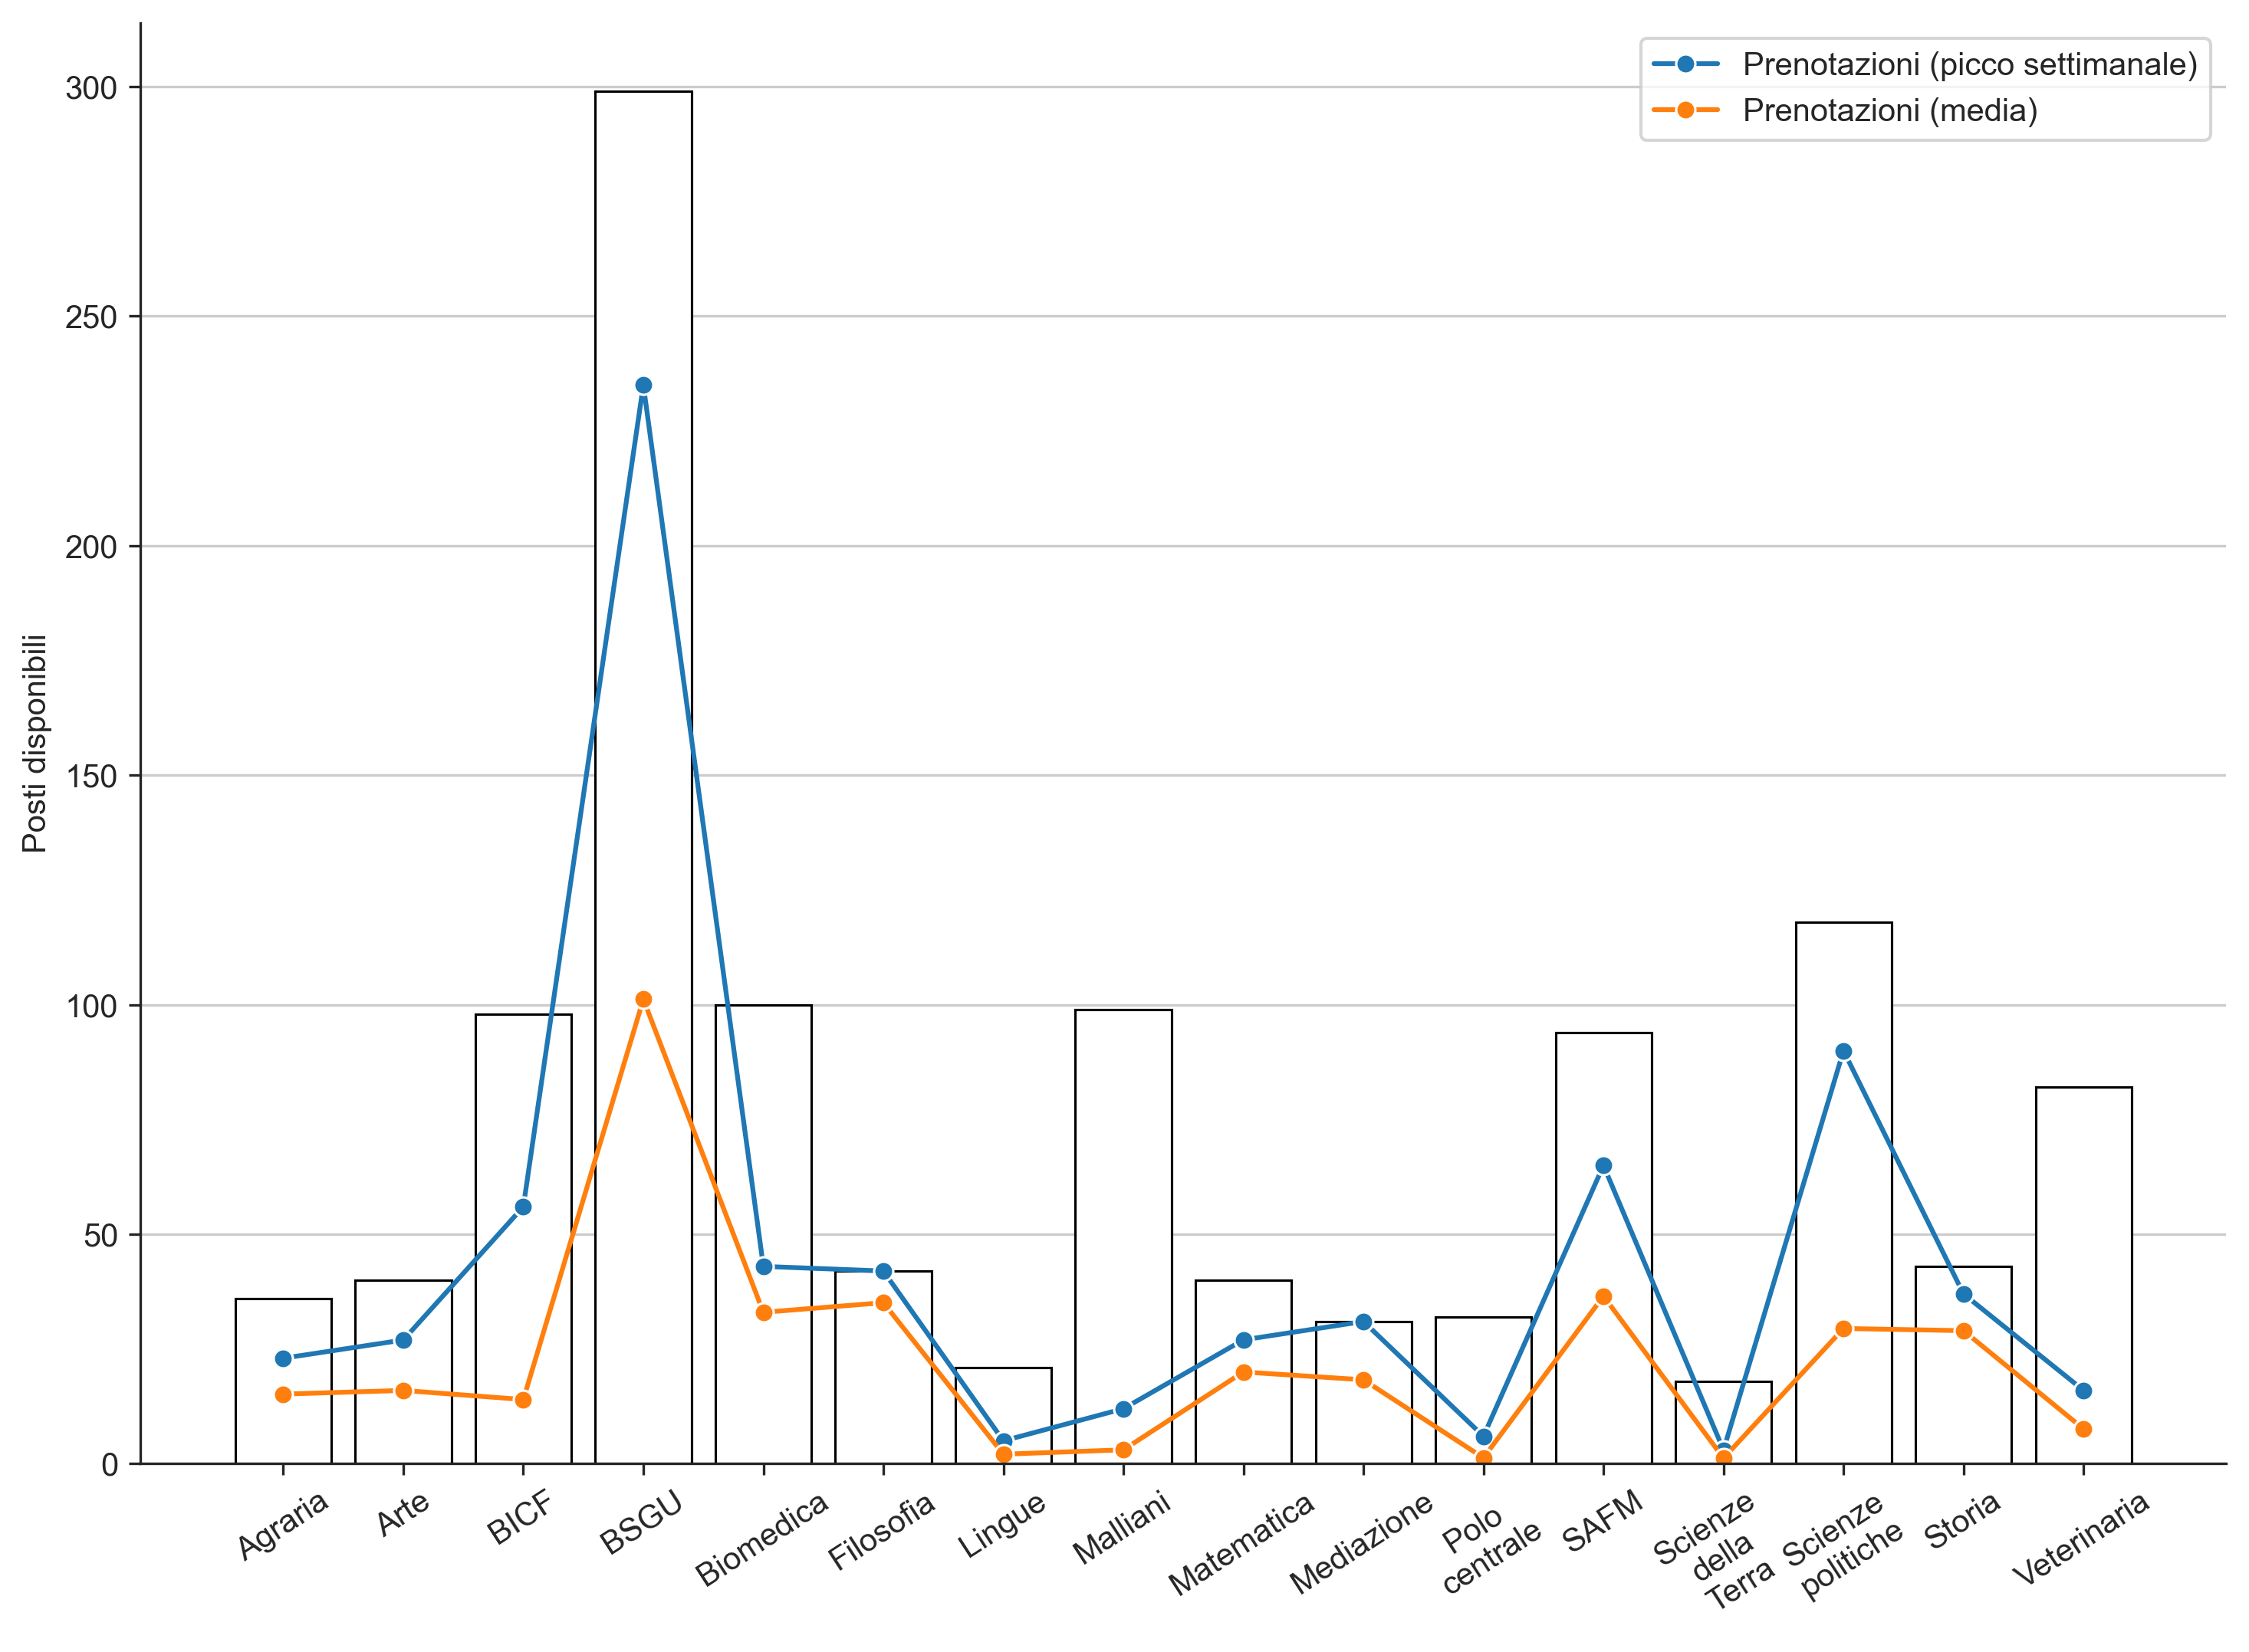

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (11.7, 8.3), dpi = 300)
sns.set_style("ticks")

# plt.title("Esay Planning. Posti a sedere, posti occupati e posti disponibili biblioteche SBA " + dfRPL[(dfRPL["Settimana"] == settimana)]["Inizio"].min() + " " + dfRPL[(dfRPL["Settimana"] == settimana)]["Fine"].max())

sns.barplot(data = dfRPL[(dfRPL["Settimana"] == settimana)],
    x = "Etichetta", y = "Posti a sedere", errwidth = 0.0, facecolor = 'white',
    edgecolor = "black", linewidth = 0.75)

sns.lineplot(data = dfRPL[(dfRPL["Settimana"] == settimana)],
    x = "Etichetta", y = "Picco", marker = "o", label = "Prenotazioni (picco settimanale)")

sns.lineplot(data = dfRPL[(dfRPL["Settimana"] == settimana)],
    x = "Etichetta", y = "Media", marker = "o", label = "Prenotazioni (media)")

sns.despine(right = True)
plt.grid(b = None, which = "both", axis = "y")
plt.xticks(rotation = 33)

plt.xlabel("")
plt.ylabel("Posti disponibili")
plt.savefig("pdf" + "/" + "Easy Planning. Posti disponibili e prenotazioni " + str(data_iniziale) + "-" + str(data_finale) + ".jpg", dpi = 300)
plt.show()

# Tabella

In [9]:
def biblioteca(biblioteca):
    if biblioteca == "Medicina":
        return "Polo centrale"
    return biblioteca

dfTMP00 = dfRPL[(dfRPL["Settimana"] == settimana)]

dfTMP01 = dfTMP00[["Biblioteca", "Posti a sedere", "Media", "Picco"]]

dfTMP01 = dfTMP01.rename(columns = {"Posti a sedere": "Posti", 'Picco': 'Prenotazioni (picco settimanale)',
    'Media': 'Prenotazioni (media)'})

dfTMP01 = dfTMP01[["Biblioteca", "Posti", "Prenotazioni (media)", "Prenotazioni (picco settimanale)"]]

dfTMP01["Biblioteca"] = dfTMP01.apply(lambda x: biblioteca(x["Biblioteca"]), axis = 1)

dfTMP01.to_excel('pdf' + "/" + "Easy Planning. Posti disponibili e prenotazioni " + str(data_iniziale) + "-" + str(data_finale) +  ".xlsx",
    index = False)

# Documento

In [10]:
from shutil import copyfile

copyfile("pdf" + "/" + "Archivio" + "/" + "PrenotazioniSBA.docx", "pdf" + "/" + "Prenotazioni" + "_" + str(data_iniziale) + "_" + str(data_finale) + ".docx")

'pdf/Prenotazioni_2021-09-27_2021-10-03.docx'

# Posti occupati biblioteca

In [10]:
def riepilogo_settimanale(biblioteca):
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize = (11.7, 8.3), dpi = 300)
    sns.set_style("ticks")

    # plt.title(biblioteca)

    sns.lineplot(data = dfRPL[(dfRPL["Biblioteca"] == biblioteca)],
        x = "Settimana", y = "Picco", marker = "o", label = "Posti occupati (picco settimanale)")

    sns.lineplot(data = dfRPL[(dfRPL["Biblioteca"] == biblioteca)],
        x = "Settimana", y = "Media", marker = "o", label = "Posti occupati (media)")

    sns.despine(right = True)
    plt.grid(b = None, which = "both", axis = "y")
    plt.xlabel("Settimane")
    plt.ylabel("Posti")
    plt.savefig("images" + "/" + "Easy Planning. Posti occupati "  + str(anno) + " " + biblioteca + ".jpg", dpi = 300)
    plt.show()

In [11]:
from IPython.display import clear_output

for index, row in dfLBR.iterrows():
    riepilogo_settimanale(row["sigla"])
    clear_output(wait=True)
    
clear_output(wait=True)

In [12]:
dfTMP = dfRPL[dfRPL["Settimana"] == settimana]

dfTMP.head()

,Biblioteca,Settimana,Inizio,Fine,Giorni di apertura,Posti a sedere,Apertura,Chiusura,Ore di apertura,Intervalli,Slot disponibili,Slot occupati,Ore disponibili,Ore occupate,Presenze,Elenco presenze,Media,Picco,Etichetta
486,Agraria,38,2021-09-20,2021-09-24,5,36.0,09:00,17:00,8.0,2,360.0,141,1440.0,564.0,141,"2021-09-20, 09:00-13:00: 13 * 2021-09-20, 13:0...",14.100000,19.000000,Agraria
476,Arte,38,2021-09-20,2021-09-24,5,40.0,09:30,16:00,6.5,36,7200.0,153,1300.0,450.0,153,"2021-09-20, 09:30-11:30: 1 * 2021-09-20, 09:30...",13.846154,20.692308,Arte
479,BICF,38,2021-09-20,2021-09-24,5,98.0,09:00,21:30,12.5,12,5880.0,747,6125.0,3351.0,747,"2021-09-20, 09:00-13:30: 64 * 2021-09-20, 10:0...",16.600000,64.000000,BICF
473,BSGU,38,2021-09-20,2021-09-24,5,299.0,09:00,18:00,9.0,4,5980.0,1725,13455.0,7756.0,1725,"2021-09-20, 09:00-13:00: 3 * 2021-09-20, 09:00...",115.000000,195.000000,BSGU
485,Biomedica,38,2021-09-20,2021-09-24,5,0.0,09:00,18:00,9.0,1,0.0,138,0.0,1242.0,138,"2021-09-20, 09:00-18:00: 39 * 2021-09-21, 09:0...",27.600000,39.000000,Biomedica
